In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = keras.datasets.fashion_mnist

In [0]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

Out[9]: (60000, 28, 28)

In [0]:
y_train

Out[10]: array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_name =["top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Out[18]: <matplotlib.colorbar.Colorbar at 0x7fb2863a4790>

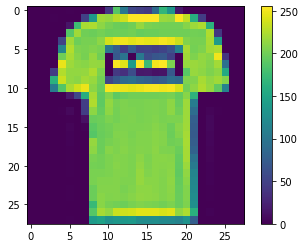

In [0]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

Out[20]: <matplotlib.colorbar.Colorbar at 0x7fb28625f670>

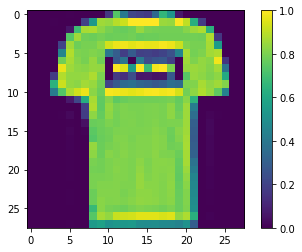

In [0]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
#Dense significa que são camadas completamente conectadas

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
#Flatten só vai transformar a imagem de 2d para 1d para assim ser usada pela rede
model.add(Dense(128, activation="relu"))
model.add(Dense(10,activation="softmax"))
#modelos de classificação tendem a usar softmax o 10 é dado ao numero de categorias

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Ao Compilar o modelo se atentar a:
- Loss Function
- Otimizador
- Métricas

In [0]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy',metrics=["accuracy"] )

In [0]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4961 - accuracy: 0.8242
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8651
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8784
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8853
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8964
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2657 - accuracy: 0.9019
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.9051
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9094
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [0]:
teste_loss, teste_acc = model.evaluate(X_test,y_test)
teste_acc

313/313 [==============================] - 40s 1ms/step - loss: 0.3492 - accuracy: 0.8806
Out[27]: 0.8805999755859375

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_prev = model.predict(X_test)
y_prev = np.argmax(y_prev, axis=-1)

In [0]:
y_prev

Out[45]: array([9, 2, 1, ..., 8, 1, 5])

### Dicas de como converter as probabilidades em classes discretas dado o tipo de problema
 - np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
 - (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

In [0]:
accuracy_score(y_test, y_prev)

Out[46]: 0.8806